# Linear Models using neural networks

In [ ]:
# for tutorial, we will be creating our own dataset, for exercise we will use an actual one
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


torch.manual_seed(42)
np.random.seed(42)

n = 100
area = np.random.uniform(800, 2500, n)
bedrooms = np.random.randint(1, 5, n)
age = np.random.randint(18, 45, n)


price = 50 * area + 10 * bedrooms - 20 * age + np.random.normal(0, 35, n)

data = pd.DataFrame({'area': area, 'bedrooms': bedrooms, 'age': age, 'price': price})
data.head()


,area,bedrooms,age,price
0,1436.718202,3,18,71542.637261
1,2416.214321,4,18,120537.094743
2,2044.389701,3,36,101555.192591
3,1817.719423,1,19,90482.563753
4,1065.231689,4,38,52515.293158


A linear model tries to learn:

price=w1xarea + w2xbedrooms + w3xage+ b

Each input feature gets its own weight.
The model's job is to find the best weights and bias that minimize prediction error.

In [ ]:
X = torch.tensor(data[['area', 'bedrooms', 'age']].values, dtype=torch.float32)
y = torch.tensor(data[['price']].values, dtype=torch.float32)
#There are 3 features, so the input shape for each example is [3].

In [ ]:
model = nn.Linear(in_features=3, out_features=1)
print(model)


Linear(in_features=3, out_features=1, bias=True)


In [ ]:
criterion = nn.L1Loss()  # Mean Absolute Error
optimizer = optim.Adam(model.parameters(), lr=0.1)# try different lr, like 0.01 to 2.0


In [ ]:
epochs = 100
#try different training step and see how parmeters come close
# what is shown down is after chaning epochs and lr, in different combinations
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.2f}')


Epoch [20/100], Loss: 29.24
Epoch [40/100], Loss: 29.13
Epoch [60/100], Loss: 29.05
Epoch [80/100], Loss: 28.99
Epoch [100/100], Loss: 28.98


## lets see what it learned

In [ ]:
for name, param in model.named_parameters():
    print(name, param.data)


weight tensor([[ 50.0058,   3.1983, -19.9636]])
bias tensor([8.7458])


In [ ]:
with torch.no_grad():
    y_pred = model(X)
test_loss = criterion(y_pred, y)
print(f"Test MSE: {test_loss.item():.4f}")

Test MSE: 29.1007


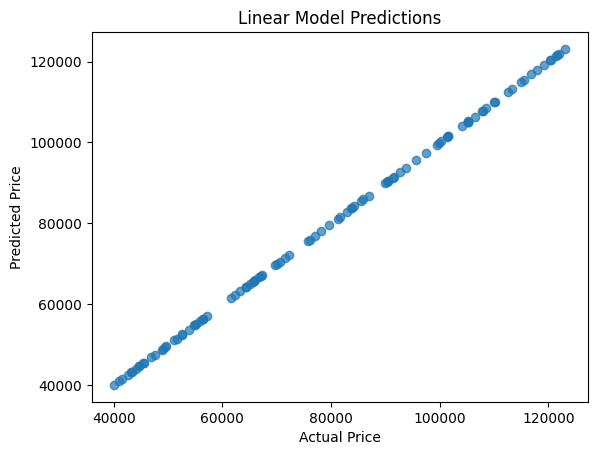

In [ ]:
with torch.no_grad():
    y_pred = model(X)

plt.figure(dpi=100)
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Model Predictions")
plt.show()
# why linear and diagonal?

# what we did above was a single layer lets make it deep

In [ ]:
price = (
    50 * area
    + 10 * bedrooms
    - 2 * (age**2)  # nonlinear term
    + np.random.normal(0, 20, n)
)

X = torch.tensor(np.column_stack([area, bedrooms, age]), dtype=torch.float32)
y = torch.tensor(price.reshape(-1, 1), dtype=torch.float32)
data = pd.DataFrame({'area': area, 'bedrooms': bedrooms, 'age': age, 'price': price})
data.head()

,area,bedrooms,age,price
0,1436.718202,3,18,71176.342569
1,2416.214321,4,18,120177.903243
2,2044.389701,3,36,99633.934487
3,1817.719423,1,19,90178.045193
4,1065.231689,4,38,50419.381283


In [ ]:
class DeepModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(3, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.net(x)

deep_model = DeepModel()
print(deep_model)


DeepModel(
  (net): Sequential(
    (0): Linear(in_features=3, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [ ]:
criterion = nn.L1Loss()
optimizer = optim.Adam(deep_model.parameters(), lr=0.01)

epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = deep_model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.2f}')


Epoch [100/5000], Loss: 1607.72
Epoch [200/5000], Loss: 1040.10
Epoch [300/5000], Loss: 580.99
Epoch [400/5000], Loss: 289.41
Epoch [500/5000], Loss: 291.35
Epoch [600/5000], Loss: 276.33
Epoch [700/5000], Loss: 287.27
Epoch [800/5000], Loss: 275.99
Epoch [900/5000], Loss: 255.02
Epoch [1000/5000], Loss: 256.38
Epoch [1100/5000], Loss: 260.75
Epoch [1200/5000], Loss: 237.50
Epoch [1300/5000], Loss: 240.59
Epoch [1400/5000], Loss: 234.18
Epoch [1500/5000], Loss: 233.78
Epoch [1600/5000], Loss: 231.07
Epoch [1700/5000], Loss: 283.37
Epoch [1800/5000], Loss: 239.28
Epoch [1900/5000], Loss: 218.21
Epoch [2000/5000], Loss: 272.78
Epoch [2100/5000], Loss: 212.89
Epoch [2200/5000], Loss: 210.87
Epoch [2300/5000], Loss: 275.67
Epoch [2400/5000], Loss: 203.89
Epoch [2500/5000], Loss: 209.05
Epoch [2600/5000], Loss: 200.90
Epoch [2700/5000], Loss: 221.46
Epoch [2800/5000], Loss: 194.27
Epoch [2900/5000], Loss: 252.22
Epoch [3000/5000], Loss: 196.64
Epoch [3100/5000], Loss: 188.98
Epoch [3200/500

In [ ]:
for name, param in deep_model.named_parameters():
    print(name, param.data)


net.0.weight tensor([[ 1.1017,  0.5396, -1.7177],
        [-0.0566,  0.3144, -0.0133],
        [-0.0391,  0.2573, -0.0818],
        [-0.0505, -0.0483, -0.2489],
        [-0.0768, -0.6151, -0.3602],
        [-0.1682,  0.3347,  0.0707],
        [-0.4615,  0.0202, -0.2106],
        [-0.3612, -0.3641, -0.4786],
        [ 0.6196,  1.0695, -1.4097],
        [-0.4890,  0.5216,  0.2982],
        [-0.5132,  0.3120,  0.4202],
        [-0.4996,  0.0838, -0.0461],
        [ 1.0459,  0.8857, -1.6172],
        [-0.1360,  0.4949,  0.2906],
        [-0.2729, -0.4146, -0.1158],
        [-0.4683,  0.3753,  0.3255],
        [-0.1060, -0.0073,  0.2003],
        [-0.4615, -0.1740,  0.5143],
        [ 0.9963,  0.8327, -2.1659],
        [ 0.8345,  0.6886, -1.7788],
        [-0.1944,  0.3596, -0.2090],
        [-0.4999, -0.2447, -0.2041],
        [-0.0901, -0.1319, -0.2180],
        [ 1.0901,  1.0536, -1.2755],
        [-0.3270, -0.1818, -0.4997],
        [ 0.7989,  0.8505, -2.3657],
        [-0.1582, -0.4688

In [ ]:
with torch.no_grad():
    y_pred = deep_model(X)
test_loss = criterion(y_pred, y)
print(f"Test MSE: {test_loss.item():.4f}")

Test MSE: 341.5756


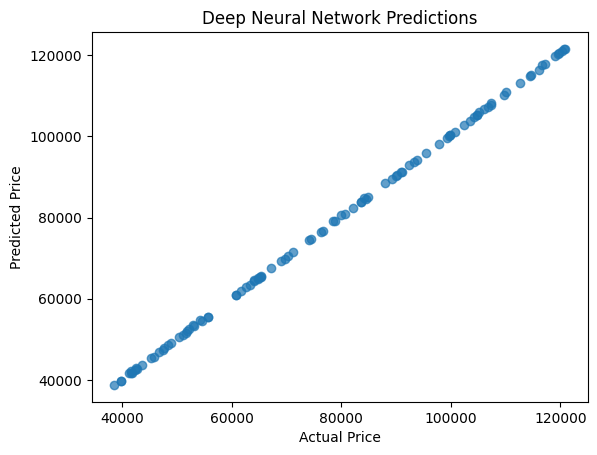

In [ ]:
with torch.no_grad():
    y_pred = deep_model(X)

plt.figure(dpi=100)
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Deep Neural Network Predictions")
plt.show()


# Exercise: Neural Network on Iris Dataset
1. Iris dataset is already loaded for you, it  and check the shapes.
2. Check if you need to preprocess the inputs (e.g., scaling).
3. Split the data into training and test sets.
4. Define a neural network appropriate for the task.
5. Use a suitable loss function(crossentropyloss) and an optimizer.
6. Train the model on the training set.
7. Evaluate it on the test set and report accuracy.

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# ---------------------------------------------------------
# 1. Load the Iris dataset
# ---------------------------------------------------------
iris = datasets.load_iris()
X = iris.data        # (150, 4)
y = iris.target      # (150,)

print("Input Shape:", X.shape)
print("Target Shape:", y.shape)

# ---------------------------------------------------------
# 2. Preprocess the inputs (Scaling)
# ---------------------------------------------------------
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ---------------------------------------------------------
# 3. Train-Test Split
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test  = torch.tensor(y_test, dtype=torch.long)

# ---------------------------------------------------------
# 4. Define a Neural Network
# ---------------------------------------------------------
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 16)     # 4 input features → 16 hidden units
        self.fc2 = nn.Linear(16, 12)
        self.fc3 = nn.Linear(12, 3)     # 3 classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = IrisNet()

# ---------------------------------------------------------
# 5. Loss Function & Optimizer
# ---------------------------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# ---------------------------------------------------------
# 6. Training the Model
# ---------------------------------------------------------
epochs = 100
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# ---------------------------------------------------------
# 7. Evaluating the Model
# ---------------------------------------------------------
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test).sum().item() / len(y_test)

print("\nTest Accuracy:", accuracy * 100, "%")


Input Shape: (150, 4)
Target Shape: (150,)
Epoch 10/100, Loss: 0.8213
Epoch 20/100, Loss: 0.4281
Epoch 30/100, Loss: 0.2671
Epoch 40/100, Loss: 0.1639
Epoch 50/100, Loss: 0.0925
Epoch 60/100, Loss: 0.0654
Epoch 70/100, Loss: 0.0551
Epoch 80/100, Loss: 0.0499
Epoch 90/100, Loss: 0.0472
Epoch 100/100, Loss: 0.0453

Test Accuracy: 100.0 %
